# Variational Inference with Normalizing Flows

# Limitation of Variational Inference Methods

Variational inference requires that intractable posterior distributions be approximated by a class of **known** probability distributions, over which we search for the best approximation to the true posterior. However, the class of approximations used is often **limited**, which leads to two commonly experienced problems:

*  Under-estimation of the variance of the posterior distribution
*  Biases in MAP estimates of any model parameters

The optimal variational distribution allows $\mathbb{D}_{KL}[q\|p]=0$, when $q_{\phi}(\textbf{z}|\textbf{x})=p_{\theta}(\textbf{z}|\textbf{x})$, that is, our approximation matches the true posterior distribution.

Due to the available choices of approximating families, the variational methodology has one limitation that even in an asymptotic regime we **can not ** obtain the true posterior. Thus, an ideal family of variational distributions $q_{\phi}(\textbf{z}|\textbf{x})$ is one that is __highly, preferably flexible enough__.

A **normalizng flow** describes _the transformations of a probability density through a sequence of invertible mappings_. At the end of this sequence we obtain a valid probability distribution.

---
# The Basic Rule for Transformation of Densities

Considering an invertible, smooth mapping: $f:\mathbb{R}^d\rightarrow\mathbb{R}^d$ with inverse $f^{-1}=g$, i.e. the composition $g\circ f(\textbf{z})=\textbf{z}$.

Now, using this mapping to transform a random variable $\textbf{z}$ with distribution $q(\textbf{z})$, then, the resulting random variable $\textbf{z}'=f(\textbf{z})$ has a distribution:
\begin{equation}
 q(\textbf{z}')=q(\textbf{z})|\det\frac{\partial f^{-1}}{\partial \textbf{z}}|=q(\textbf{z})|\det\frac{\partial f}{\partial\textbf{z}}|^{-1}
\end{equation}
where the last equality can be seen by applying the __chain rule__ (inverse function theorem) and is a property of __Jacobians of invertible functions__.

---
# Normalizing Flows

## Finite Flows

To construct **arbitrarily complex** densities by composing several simple maps and successively transforming a random variable $\textbf{z}_0$ with distribution $q_0$ through a chain of $K$ transformations $f_k$ is:
\begin{equation}
\textbf{z}_K = f_K\circ...\circ f_1(\textbf{z}_0)
\end{equation}
\begin{equation}
\ln q_K(\textbf{z}_K)=\ln q_0(\textbf{z}_0)-\sum_{k=1}^K\ln|\det\frac{\partial f_k}{\partial \textbf{z}_{k-1}}|
\end{equation}

* The path traversed by the random variables $\textbf{z}_k=f_k(\textbf{z}_{k-1})$ with initial distribution $q_0(\textbf{z}_0)$ is called the **flow**
* The path formed by the successive distributions $q_k$ is a **normalizing flow**


**The Law of the Unconscious Statistician (LOTUS)**

Expectations w.r.t. the transformed density $q_K$ can be computed __without explicitly knowing__ $q_K$. Any expectation $\mathbb{E}_{q_K}[h(\textbf{z})]$ can be written as an expectation under $q_0$ as:
\begin{equation}
\mathbb{E}_{q_K}[h(\textbf{z})]=\mathbb{E}_{q_0}[h(f_k\circ f_{K-1}\circ...\circ f_1(\textbf{z}_0))]
\end{equation}

The effect of invertible flows as a sequence of expansions or contractions on the initial density:
* For an __expansion__, the map $\textbf{z}'=f(\textbf{z})$ pulls the points $\textbf{z}$ away from a region in $\mathbb{R}^d$, reducing the density in that region while increasing the density outside the region.
* For a __contraction__, the map pushes points towards the interior of a region, increasing the density in its interior while reducing the density outside.

**Summarization**

With an appropriate choice of transformations $f_K$, we can initially use simple factorized distributions such as **an independent Gaussian**, and apply normalizing flows of different lengths to obtain **increasingly complex and multi-modal distributions**.

---
# Infinitesimal Flows

If the length of the normalizing flows tends to __infinity__, in this case, it is referred as __infinitesimal flow__, which no longer represents a finite sequence of transformations, but as a partial differential equation describing _how the initial density $q_0(\textbf{z})$ evolves over 'time'_: $\frac{\partial}{\partial t}q_t(\textbf{z})=\tau_{t}[q_t(\textbf{z})]$, where $\tau$ describes the continuous-time dynamics.

## Langevin Flow

From MCMC lecture, we have learnd one important family of dynamics over continuous time, that is, __Langevin dynamics__, which can bring our samples faster to region of high probability by using the __gradient information__. The Langevan dynamics has the following differential equation:
\begin{equation*}
dX(t)=X(t+\Delta)-X(t)=f(X(t))\Delta+\eta\sqrt{\Delta}
\end{equation*}
where $X=(X_1,...,X_N)$ are our samples,  and $f=(f_1,...,f_N)$ are a sequence of transformations.

More generally, Langevin dynamics is given by the __Langevin stochastic differential equation(SDE)__:
\begin{equation*}
d\textbf{z}(t)=\textbf{F}(\textbf{z}(t),t)dt+\textbf{G}(\textbf{z}(t),t)d\xi(t)
\end{equation*}
where:
* $d\xi(t)$ is the step size, how far the density moves
* $\textbf{F}$ is the drift vector, which indicates how our density is changed along time
* $\textbf{D}=\textbf{G}\textbf{G}^T$ is the diffusion matrix, that describes where density moves to

If we transform a random variable $\textbf{z}$ with initial density $q_0(\textbf{z})$ through the above Langevin flow, then, at time $t$, the corresponding density $q_t(\textbf{z})$ is given by the following euqation(using second order Taylor expansion):
\begin{equation*}
\frac{\partial}{\partial t}q_t(\textbf{z})=-\sum_i\frac{\partial}{\partial z_i}[F_i(\textbf{z},t)q_t]+\frac{1}{2}\sum_{i,j}\frac{\partial^2}{\partial z_i\partial z_j}[D_{ij}(\textbf{z},t)q_t]
\end{equation*}

A example from the MCMC lecture: for $\Delta\rightarrow0$, the change of the marginal density $p_t(x)$ of the random variable $x_t$ is given by:
\begin{equation*}
\frac{\partial}{\partial t}p_t(\textbf{x})=-\sum_i\frac{\partial}{\partial x_i}[f_i(\textbf{x},t)p_t(x)]+\frac{1}{2}\sum_{i}\frac{\partial^2}{\partial x_i^2}p_t(x)
\end{equation*}

If we start from an initial density $q_0(\textbf{z})$ and evolve its samples $\textbf{z}_0$ through the Langevin SDE, the resulting points $\textbf{z}_{\infty}$ will be distributed according to $q_{\infty}(\textbf{z})\propto e^{-\mathcal{L}(\textbf{Z})}$, where $\mathcal{L}(\textbf{Z})$ is an __unnormalised log-density(Boltzmann distribution)__ of our model.

## Hamiltonian Flow

Hamiltonian Monte Carlo can also be described in terms of a normalizing flow on an agumented space $\tilde{\textbf{z}}=(\textbf{z},\textbf{w})$ with dynamics resulting from the Hamiltonian $$\mathcal{H}(\textbf{z},\textbf{w})=-\mathcal{L}(\textbf{z})-\frac{1}{2}\textbf{w}^T\textbf{M}\textbf{w}$$ 
where:
* $\mathcal{L}(\textbf{z})$ as __potential energy__ w.r.t. the location information $\textbf{z}$
* $\textbf{w}$ is velocity and $\textbf{M}$ is mass, thus, $\frac{1}{2}\textbf{w}^T\textbf{M}\textbf{w}$ is **kinetic energy**

Hamiltonian dynamics is based on the mechanical energy balance in a closed system.

---

# Implementation of two Normalizing Flows

## The Planar Flows

1.   A family of transformations of the form: $f(\textbf{z})=\textbf{z}+\textbf{u}\cdot h(\textbf{w}^T\textbf{z}+b)$
2.   Its log det-Jacobian term: $|det\frac{\partial f}{\partial \textbf{z}}|=|det(\textbf{I}+\textbf{u}\psi(\textbf{z})^T)|=|1+\textbf{u}^T\psi(\textbf{z})|$

where:

* $h(\cdot)=\tanh(\cdot)$ or a smooth element-wise non-linearity function
*  All parameters  $\lambda=\{\textbf{w}\in\mathbb{R}^D, \textbf{u}\in\mathbb{R}^D, b\in\mathbb{R}\}$
*  $\psi(\cdot)=h'(\textbf{w}^T\textbf{z}+b)\textbf{w}$

As a consequence of planar flows, the resulting density $q_K(\textbf{z})$ is implicitly given by:

*   $\textbf{z}_K=f_k\circ f_{K-1}\circ...\circ f_1(\textbf{z})$
*   $\ln q_K(\textbf{z}_K)=\ln q_0(\textbf{z})-\sum_{k=1}^K\ln|1+\textbf{u}_k^T\psi_k(\textbf{z}_{k-1})|$

The intuitive effect of planar flows is applying __a series of contractions and expansions__ in the direction perpendicular to the hyperplane $\textbf{w}^T\textbf{z}+b=0$


## The Radial Flows

1.   A family of transformations that modify an initial density $q_0$ around a reference point $\textbf{z}_0$: $f(\textbf{z})=\textbf{z}+\beta\cdot h(\alpha, r)(\textbf{z}-\textbf{z}_0)$
2.    Its log det-Jacobian term: $|det\frac{\partial f}{\partial \textbf{z}}|=[1+\beta h(\alpha, r)]^{d-1}[1+\beta h(\alpha, r)+\beta h'(\alpha, r)r]$

where:
  
* $r=\|\textbf{z}-\textbf{z}_0\|$ 
* $h(\alpha, r)=1/(\alpha+r)$ and $h'(\alpha, r)=-1/(\alpha+r)^2$
* All parameters of the map: $\lambda=\{\textbf{z}_0\in\mathbb{R}^D, \alpha\in\mathbb{R}^+, \beta\in\mathbb{R}\}$

The final density $q_K(\textbf{z})$ is implicitly given by:
*   $\textbf{z}_K=f_k\circ f_{K-1}\circ...\circ f_1(\textbf{z})$
*   $\ln q_K(\textbf{z}_K)=\ln q_0(\textbf{z})-\sum_{k=1}^K\ln|\det\frac{\partial f}{\partial \textbf{z}_{k-1}}|$

The radial flows apply radial contractions and expansions around the reference point $\textbf{z}_0$.

## Experiment 1: implementation of above two flows

We show the effect of expansions and contractions on a __uniform__ and __Gaussian__ initial density using the above described flows:

* Two dimensional Gaussian distribution: $p(\textbf{z})\propto\exp(-\frac{1}{2}(\textbf{z}-\mu)\Sigma^{-1}(\textbf{z}-\mu)^T)$, when $\textbf{z}$ is a row vector
* Two dimensional discrete uniform distribution, which $i\in\{1,...,m\}$ and $j\in\{1,...,j\}$, the distribution density is: $p(X=x_{i,j})=\frac{1}{m\cdot n}$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import abc

In [0]:
class Flows(abc.ABC):
  __metaclass__ = abc.ABCMeta
  
  @abc.abstractmethod
  def reset_params(self):
    return
  
  @abc.abstractmethod
  def h(self, alpha, r=0):
    return
  
  @abc.abstractmethod
  def h_prime(self, alpha, r=0):
    return
  
  @abc.abstractmethod
  def m(self, x):
    return
  
  @abc.abstractmethod
  def check(self):
    return
  
  @abc.abstractmethod
  def condition(self, alpha, beta):
    return 
  
  @abc.abstractmethod
  def f(self, z):
    return  
  
  @abc.abstractmethod
  def log_det(self, z, Q=None):
    return

In [0]:
class PlanarFlows(Flows):
  def __init__(self):
    super().__init__()
    
    self.u = np.random.randn(1,2)
    self.w = np.random.randn(1,2)
    self.b = np.random.randint(5, size=(1,1))
    
    self.check()
    
  def check(self):
    if self.w.dot(self.u.T) <= -1.:
      self.u = self.condition()
      
  def reset_params(self):
    self.u = np.random.randn(1,2)
    self.w = np.random.randn(1,2)
    self.b = np.random.randint(5, size=(1,1))
    
    self.check()
    
  def h(self, alpha, r=0):
    return np.tanh(alpha)
  
  def h_prime(self, alpha, r=0):
    return 1 - np.tanh(alpha)**2
  
  def m(self, x):
    return -1 + np.log(1 + np.exp(x))
  
  def condition(self):
    return self.u + (self.m(self.w.dot(self.u.T)) - self.w.dot(self.u.T))\
              * self.w / (self.w.dot(self.w.T) + 1e-7)
  
  def f(self, z):
    return z + self.u * self.h(self.w.dot(z.T)+self.b).T
  
  def log_det(self, z, Q=None):
    psi = self.h_prime(z.dot(self.w.T) + self.b) * self.w
    return Q - np.log(np.absolute( 1 + psi.dot(self.u.T)) + 1e-7)

In [0]:
class RadialFlows(Flows):
  def __init__(self, *args):
    super().__init__()
    
    self.alpha = np.random.uniform(-.01,.01)
    self.beta = np.random.uniform(-.01,.01)
    self.z_ref = np.random.uniform(-1,1,size=(1,2))
    self.d = args[0]
    
    self.check()
    
  def check(self):
    if self.beta < -self.alpha:
      self.beta = self.condition()
      
  def reset_params(self):
    self.alpha = np.random.uniform(-.01,.01)
    self.beta = np.random.uniform(-.01,.01)
    self.z_ref = np.random.uniform(-1,1,size=(1,2))
    
    self.check()
      
  def h(self, alpha, r=0):
    return 1 / (alpha + r + 1e-7)
  
  def h_prime(self, alpha, r=0):
    return - 1 / (alpha + r + 1e-7)**2
  
  def m(self, x):
    return np.log( 1 + np.exp(x) )
  
  def condition(self):
    return -self.alpha + self.m(self.beta)
  
  def f(self, z):
    r = np.linalg.norm( (z - self.z_ref), axis=1, keepdims=True)
    return z + self.beta * self.h(self.alpha, r) * (z - self.z_ref)
  
  def log_det(self, z, Q=None):
    r = np.linalg.norm( (z - self.z_ref), axis=1, keepdims=True)
    common = 1 + self.beta * self.h(self.alpha, r)
    log_det = ( common )**(self.d-1)\
                * ( common + self.beta * self.h_prime(self.alpha, r)* r)
    return Q - np.log(log_det + 1e-7)

In [0]:
def Q(Z, mu, sigma):
    Sigma = sigma * np.identity(Z.shape[1])
    return np.diag( np.exp(-.5 * (Z - mu).dot(np.linalg.inv(Sigma).dot((Z - mu).T)) ) )
  
xlim = (-5, 5)
ylim = (-5, 5)
xres = 100
yres = 100

x = np.linspace(xlim[0], xlim[1], xres)
y = np.linspace(ylim[0], ylim[1], yres)
xx, yy = np.meshgrid(x,y)

Z_0 = np.c_[xx.ravel(), yy.ravel()]

Q_0 = np.log(Q(Z_0, 0, 1) + 1e-7 )

In [0]:
Planar = PlanarFlows()

Z = Z_0
Q = Q_0[:,None]
Res = [np.exp(Q).reshape(xres,yres)]

for i in np.arange(0,10):
  Z = Planar.f(Z)
  Q = Planar.log_det(Z, Q)
  if i == 1:
    Res.append(np.exp(Q).reshape(xres,yres))
  elif i == 2:
    Res.append(np.exp(Q).reshape(xres,yres))
  elif i == 9:
    Res.append(np.exp(Q).reshape(xres,yres))
  Planar.reset_params()

Radial = RadialFlows(Z_0.shape[1])

Z = Z_0
Q = Q_0[:,None]

for i in np.arange(0,10):
  Z = Radial.f(Z)
  Q = Radial.log_det(Z, Q)
  if i == 1:
    Res.append(np.exp(Q).reshape(xres,yres))
  elif i == 2:
    Res.append(np.exp(Q).reshape(xres,yres))
  elif i == 9:
    Res.append(np.exp(Q).reshape(xres,yres))
  Radial.reset_params()

In [0]:
U_0 = np.empty((xres * yres))
U_0.fill(1. / (xres * yres))

Z = Z_0
U = U_0[:,None]
Planar.reset_params()
Res.append(U.reshape(xres,yres))
for i in np.arange(0,10):
  Z = Planar.f(Z)
  U = Planar.log_det(Z, U)
  if i == 1:
    Res.append(U.reshape(xres,yres))
  elif i == 2:
    Res.append(U.reshape(xres,yres))
  elif i == 9:
    Res.append(U.reshape(xres,yres))
  Planar.reset_params()
  
Z = Z_0
U = U_0[:,None]
Radial.reset_params()
for i in np.arange(0,10):
  Z = Radial.f(Z)
  U = Radial.log_det(Z, U)
  if i == 1:
    Res.append(U.reshape(xres,yres))
  elif i == 2:
    Res.append(U.reshape(xres,yres))
  elif i == 9:
    Res.append(U.reshape(xres,yres))
  Radial.reset_params()

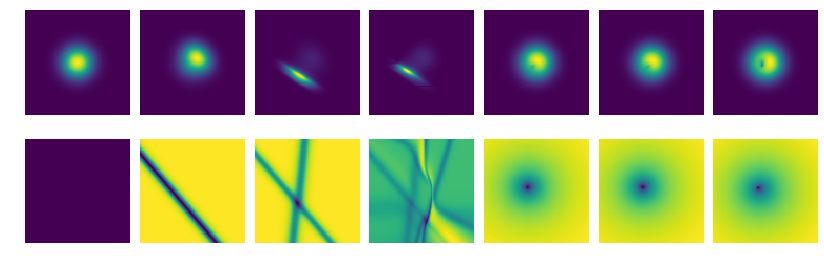

In [0]:
fig=plt.figure(figsize=(20, 20))
columns = 7
rows = 2
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Res[i-1],cmap='viridis')
    plt.axis('off')
plt.subplots_adjust(top=0.25, bottom=0.08, left=0.10, right=0.65, hspace=0.1,
                    wspace=0.1)
plt.show()

# Invertibility Conditions

__Not all__ functions could be treated as the transformations of planar or radial flows, there are some conditions to fulfill, in order to be invertible maps.

## Planar Flows

$f(\textbf{z})$ is invertible, when $\textbf{w}^T\textbf{u}\geq-1$, that is, $\hat{\textbf{u}}(\textbf{w},\textbf{u})=\textbf{u}+[m(\textbf{w}^T\textbf{u})-(\textbf{w}^T\textbf{u})]\frac{\textbf{w}}{\|\textbf{w}\|^2}$, where $m(x)=-1+\log(1+e^x)$

## Radial Flows

$f(\textbf{z})$ is invertible, only if $\beta\geq-\alpha$. This constraint is imposed by reparameterizing $\beta$ as $\hat{\beta}=-\alpha+m(\beta)$, where $m(x)=\log(1+e^x)$

# Representative Power of Normalizing Flows

To provide an insight into the representative power of density approximations based on normalizing flows, there are four 2D test energy functions with an unnormalized form $p(\textbf{z})\propto\exp[-U(\textbf{z})]$:

1. $\frac{1}{2}(\frac{\|\textbf{Z}-2\|}{0.4})^2-\ln(e^{-\frac{1}{2}[\frac{\textbf{Z}_1-2}{0.6}]^2}+e^{-\frac{1}{2}[\frac{\textbf{Z}_1+2}{0.6}]^2})$
2. $\frac{1}{2}[\frac{\textbf{Z}_2-w_1(\textbf{Z})}{0.4}]^2$
3. $-\ln(e^{-\frac{1}{2}[\frac{\textbf{Z}_2-w_1(\textbf{Z})}{0.35}]^2}+e^{-\frac{1}{2}[\frac{\textbf{Z}_2-w_1(\textbf{Z})+w_2(\textbf{Z})}{0.35}]^2})$
4. $-\ln(e^{-\frac{1}{2}[\frac{\textbf{Z}_2-w_1(\textbf{Z})}{0.4}]^2}+e^{-\frac{1}{2}[\frac{\textbf{Z}_2-w_1(\textbf{Z})+w_3(\textbf{Z})}{0.35}]^2})$


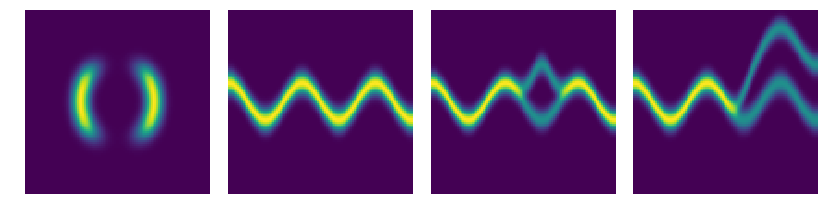

In [0]:
def w1(Z):
    return np.sin( ( 2 * np.pi * Z[:,0]) / 4. )

def w2(Z):
    return 3 * np.exp( -.5 * ((Z[:,0] - 1) / .6) * ((Z[:,0] - 1) / .6) )

def delta(x):
    return 1 / ( 1 + np.exp(-x) )

def w3(Z):
    return 3 * delta( (Z[:,0] - 1) / .3 )

def p(func):
    def wrapper(*args, **kwargs):
        return np.exp( -func(*args, **kwargs) )
    return wrapper

@p
def U_1(Z):
    return 0.5 * ( ( np.linalg.norm(Z, axis=1) - 2 ) / .4 )**2\
            - np.log( np.exp( -0.5*(( Z[:,0] - 2 )/.6) * (( Z[:,0] - 2 )/.6) )\
                     + np.exp( -0.5*(( Z[:,0] + 2 )/.6) * (( Z[:,0] + 2 )/.6) ) )

True_P = []

P_1 = U_1(Z_0)
img = P_1.reshape((xres,yres))
True_P.append(img)

@p
def U_2(Z):
    tmp = (Z[:,1] - w1(Z)) / .4
    return .5 * tmp * tmp

P_2 = U_2(Z_0)
img = P_2.reshape((xres,yres))
True_P.append(img)

@p
def U_3(Z):
    tmp1 = (Z[:,1]-w1(Z)) / .35
    tmp2 = (Z[:,1]-w1(Z)+w2(Z)) / .35
    return -np.log( np.exp( -.5 * tmp1 * tmp1 )\
                  + np.exp( -.5 * tmp2 * tmp2 ) )

P_3 = U_3(Z_0)
img = P_3.reshape((xres,yres))
True_P.append(img)


@p
def U_4(Z):
    tmp1 = (Z[:,1]-w1(Z)) / .4
    tmp2 = (Z[:,1]-w1(Z)+w3(Z)) /.35
    return -np.log( np.exp( -.5 * tmp1 * tmp1 )\
                  + np.exp( -.5 * tmp2 * tmp2 ) )
P_4 = U_4(Z_0)
img = P_4.reshape((xres,yres))
True_P.append(img)

fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 1
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(True_P[i-1],cmap='viridis')
    plt.axis('off')
plt.subplots_adjust(top=0.25, bottom=0.08, left=0.10, right=0.65, hspace=0.1,
                    wspace=0.1)
plt.show()

## Experiment 2: Approximation four non-Gaussian 2D Distributions with Neuron Networks



1. Initial distribution is a **diagonal Gaussian**: $q_0\sim\mathcal{N}(\mu,\sigma^2I)$
2. The length of normalizing flows $K=2,8,32$

Loss function is KL-divergence: $$\mathbb{D}(q_K(\textbf{z}_K)||p(\textbf{z}))=\int d\textbf{z}_Kq_K(\textbf{z}_K)\log\frac{ q_K(\textbf{z}_K)}{p(\textbf{z})}=\mathbb{E}_{q_0}(\textbf{z}_0)[\ln q_K(\textbf{z}_K)-\log p(\textbf{z})]$$

where $\ln q_K(\textbf{z}_K)=\ln q_o(z_0)-\sum_{k=1}^K\ln[1+u_k^T\psi_k(\textbf{z})_{k-1}]$ and $p(\textbf{z})\propto\exp[-U(\textbf{z})]$

Using Monte Carlo estimation, the **loss function** should be:

\begin{equation}
  \mathbb{D}(q_K||p)=\frac{1}{p}\sum_{\alpha=1}^{p}\{\ln q_0(\textbf{z}_0^\alpha)-\sum_{k=1}^K\ln(1+u_k^T\psi_k(\textbf{z}_{k-1}^{\alpha}))+U(\textbf{z}^\alpha)\}
\end{equation}


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
from torch.autograd import Variable
from torch.distributions import multivariate_normal
from torch import optim
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [0]:
def w1(Z1):                               
    return (torch.sin((2*np.pi*Z1)/4))

def w2(Z1):
    return (3*torch.exp(-0.5*((Z1 - 1) / .6)**2))

def func_sigma(x):
    return 1 / ( 1 + torch.exp(-x) )

def w3(Z1):
    return 3*(func_sigma((Z1-1)/0.3))

def p(func):
    def wrapper(*args, **kwargs):
        return func(*args, **kwargs)
    return wrapper

@p
def U1_(Z):
    Z1,Z2 = torch.chunk(Z, chunks=2, dim=1)
    return 0.5 * ( ( torch.norm(Z, 2, 1, keepdim=True) - 2 ) / .4 )**2\
            - torch.log( torch.exp( -0.5*(( Z1 - 2 )/.6) * (( Z1 - 2 )/.6) )\
                     + torch.exp( -0.5*(( Z1 + 2 )/.6) * (( Z1 + 2 )/.6) ) + 1e-7 )
@p
def U2_(Z):
    Z1, Z2 = torch.chunk(Z, chunks=2, dim=1)
    tmp = (Z2 - w1(Z1)) / 0.4
    return 0.5 * tmp * tmp

@p
def U3_(Z):
    Z1, Z2 = torch.chunk(Z, chunks=2, dim=1)
    tmp1 = (Z2 - w1(Z1)) / 0.35
    tmp2 = (Z2 - w1(Z1) + w2(Z1)) / 0.35
    return -torch.log( torch.exp( -.5 * tmp1 * tmp1 )\
                  + torch.exp( -.5 * tmp2 * tmp2 ) + 1e-7 )

@p
def U4_(Z):
    Z1, Z2 = torch.chunk(Z, chunks=2, dim=1)
    tmp1 = (Z2 - w1(Z1)) / 0.4
    tmp2 = (Z2 - w1(Z1) + w3(Z1)) /0.35
    return -torch.log( torch.exp( -.5 * tmp1 * tmp1 )\
                  + torch.exp( -.5 * tmp2 * tmp2 ) + 1e-7 )

In [0]:
class PF(torch.nn.Module):
    def __init__(self, dim):
        super(PF, self).__init__()
        
        self.w = torch.nn.Parameter(torch.Tensor(1,dim))                       
        self.b = torch.nn.Parameter(torch.Tensor(1))
        self.u = torch.nn.Parameter(torch.Tensor(1,dim))
        self.h = torch.nn.Tanh()
        
        self.init_params()
    
    def init_params(self):
        self.w.data.uniform_(-.1, .1)
        self.u.data.uniform_(-.1, .1)
        self.b.data.uniform_(-.1, .1)
        
    def forward(self, z):
        prod = torch.mm(self.w, self.u.t())
        if torch.mm(self.w,self.u.t()) < -1:
          self.u.data = self.u + ( -1 + torch.nn.functional.softplus(prod)- prod )\
          * self.w / ( torch.mm(self.w, self.w.t()) + 1e-7 )
        activation = torch.nn.functional.linear(z, self.w, self.b)             
        return z + self.u * self.h(activation)
    
class PF_LogDet(torch.nn.Module):                                           
    def __init__(self, flow):
        super(PF_LogDet, self).__init__()
        
        self.w = flow.w
        self.u = flow.u
        self.b = flow.b
        self.h = flow.h
    
    def psi(self, z):
        activation = torch.nn.functional.linear(z, self.w, self.b)
        return (1 - (self.h( activation ))**2 ) * self.w
    
    def forward(self, z):
        return torch.log( ( 1 + torch.mm(self.psi(z), self.u.t()) ).abs() + 1e-7 )
    
class PlanarFlows(torch.nn.Module):
    def __init__(self, *args):
        super(PlanarFlows, self).__init__()
        
        self.flows = torch.nn.Sequential(*(             
            PF(args[0]) for k in range(args[1])
        ))
        
        self.log_dets = torch.nn.Sequential(*(          
            PF_LogDet(f) for f in self.flows
        ))
        
    def forward(self, z):
        log_dets = []
        
        for f, log_det in zip(self.flows, self.log_dets):
            log_dets.append(log_det(z))
            z = f(z)
        
        return z, log_dets

In [0]:
class RF(torch.nn.Module):
  def __init__(self, dim):
    super(RF, self).__init__()
    
    self.alpha = torch.nn.Parameter(torch.Tensor((1)))
    self.beta = torch.nn.Parameter(torch.Tensor(1))
    self.z_0 = torch.nn.Parameter(torch.Tensor(1,dim))
    self.dim = dim
    
    self.init_params()
    
  def init_params(self):
    self.alpha.data.uniform_(0,1)
    self.beta.data.uniform_(-1,1)
    self.z_0.data.uniform_(-4,4)
    
    if self.beta < -self.alpha:
      self.beta.data = -self.alpha \
                    + torch.nn.functional.softplus(self.beta.data)
      
  def forward(self, z):
    h = lambda x, y: 1 / (x + y)
    h_prime = lambda x,y: - 1. / ( x + y ).pow(2)
    
    r = torch.norm( (z-self.z_0), p=2, dim=1, keepdim=True )
    
    tmp = self.beta * h(self.alpha, r)
    
    z_k = z + tmp * (z - self.z_0)
    
    det =  (1 + tmp).pow(self.dim-1) \
          * ( 1 + tmp + self.beta * h_prime(self.alpha, r) * r )
    
    log_abs_det_jacob = torch.log(
          torch.clamp(det, min=1e-7) 
    )
    return z_k, log_abs_det_jacob
  
class RadialFlows(torch.nn.Module):
    def __init__(self, dim, K):
        super(RadialFlows, self).__init__()
        self.flows = torch.nn.ModuleList([
            RF(dim) for i in range(K)
        ])
        
    def forward(self, z):
        log_dets = []
        for flow in self.flows:
            z, logdet = flow(z)
            log_dets.append(logdet)
        
        return z, log_dets

In [0]:
class KL(torch.nn.Module):
    def __init__(self, *args):
        super().__init__()
        
        self.p_z = args[0]
        self.base = args[1]        
    
    def forward(self, *args):
        kl_loss = (self.base.log_prob(args[0])- sum(args[2]) \
                   + self.p_z(args[1]) ).mean()
        return kl_loss

In [0]:
def plot_densities(densities):
    d = ["U1", "U2", "U3", "U4"]
    
    X_LIMS = (-5, 5)
    Y_LIMS = (-5, 5)

    x1 = np.linspace(*X_LIMS, 500)
    x2 = np.linspace(*Y_LIMS, 500)
    x1, x2 = np.meshgrid(x1, x2)
    shape = x1.shape
    x1 = x1.ravel()
    x2 = x2.ravel()

    z = np.c_[x1, x2]
    z = torch.FloatTensor(z)
    z = Variable(z)
    
    nx = 4
    ny = 1

    dxs = 3.0
    dys = 3.0

    fig, axes = plt.subplots(1, 4, figsize=(dxs*nx, dys*ny))
    
    axes = axes.flatten()
    
    for i in range(4):
      ax = axes[i]
      density_values = densities[i](z).data.numpy().reshape(shape)

      ax.imshow(np.exp(-density_values), extent=(*X_LIMS, *Y_LIMS), cmap=cm.jet)
      ax.set_title("Test energy function: {}".format(d[i]))
      ax.grid(False)
    fig.tight_layout()
    plt.show()
    
def save_images(base, flows, iteration, K, loss):
    nx = 4
    ny = 1

    dxs = 3.0
    dys = 3.0

    fig, axes = plt.subplots(1, 4, figsize=(dxs*nx, dys*ny))
    axes = axes.flatten()
    
    for i_a in range(4):
      ax = axes[i_a]
    
      side = np.linspace(-5, 5, 500)
      X, Y = np.meshgrid(side, side)
      counts = np.zeros(X.shape)
      p = np.zeros(X.shape)

      size = [-5, 5]
      num_side = 500

      L = 200
    
      for i in range(1000):
        z_0 = base.sample(torch.Size([L]))
        q_0 = base.log_prob(z_0)
      
        z_k, jacobs = flows[i_a](z_0)
        if np.any(np.isnan(z_k.detach().numpy())):
           continue
            
        q_k = torch.exp( q_0 - torch.squeeze(sum(jacobs)) )
      
        z_k = (z_k - size[0]) * num_side / (size[1] - size[0])
        for l in range(L):
            x, y =int(z_k[l, 1]), int(z_k[l, 0])
            if 0 <= x < num_side and 0 <= y < num_side:
                counts[x, y] += 1
                p[x, y] += q_k[l].detach().numpy()
      counts = np.maximum(counts, np.ones(counts.shape))
      p /= counts
      if np.sum(p) != 0.0:
        p /= np.sum(p)
      Y = -Y
      ax.set_title(label="Loss on iteration {}: {:.3f}".format(iteration , loss[i_a].item()))
      ax.pcolormesh(X, Y, p, cmap=cm.jet)
    
    fig.tight_layout()
    fig.suptitle(t="iteration {}, K={}".format(iteration, K),y=1.1)
    plt.show()
    plt.close()
    
def scatter_points(points,iteration, flow_length):

    X_LIMS = (-4, 4)
    Y_LIMS = (-4, 4)
    
    nx = 4
    ny = 1

    dxs = 3.0
    dys = 3.0

    fig, axes = plt.subplots(1, 4, figsize=(dxs*nx, dys*ny))
    axes = axes.flatten()
    
    for i in range(4):
      ax = axes[i]
      point_i = points[i].detach().numpy()

      ax.scatter(point_i[:, 0], -point_i[:, 1], alpha=0.7, s=15)
      ax.set_xlim(*X_LIMS)
      ax.set_ylim(*Y_LIMS)
      ax.set_title(
        "Flow length: {}\n Samples on iteration #{}"
        .format(flow_length, iteration)
      )
      ax.grid(False)
    fig.tight_layout()
    plt.show()

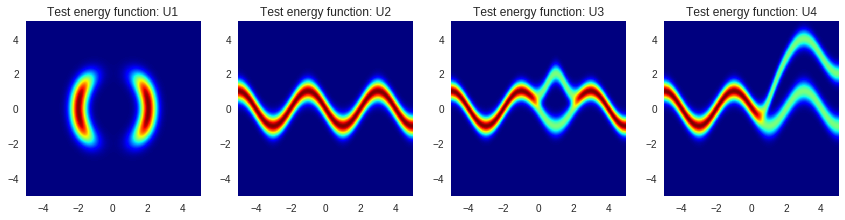

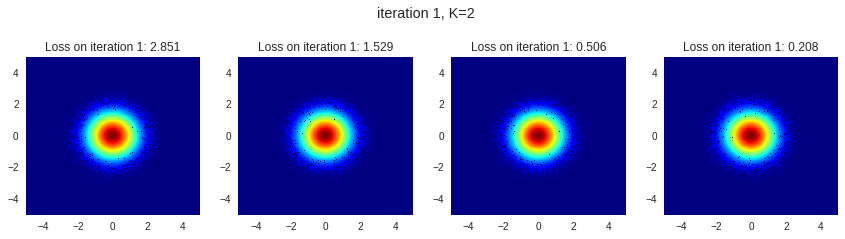

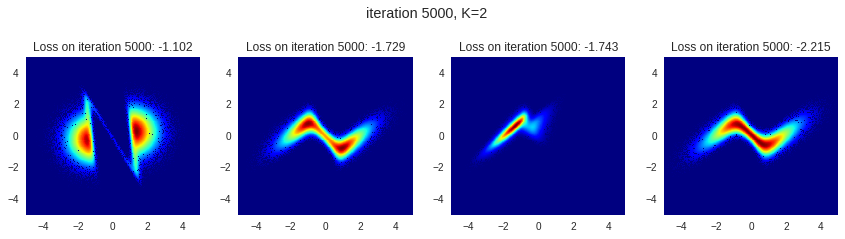

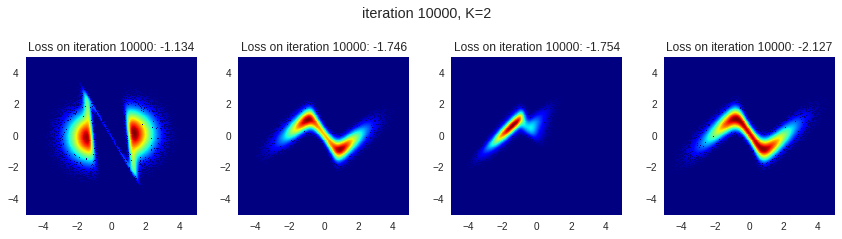

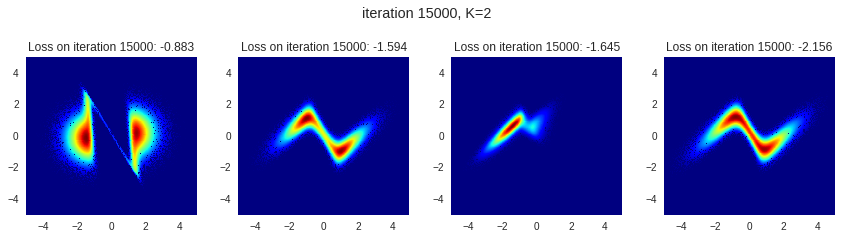

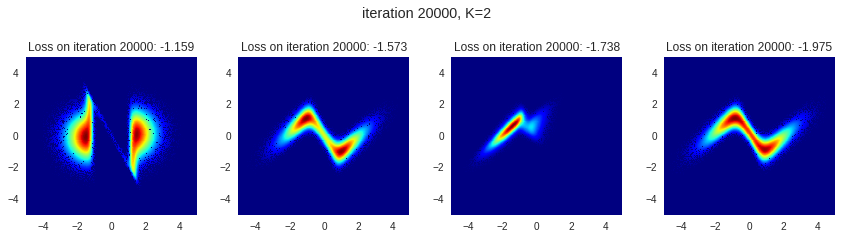

In [0]:
densities = [U1_, U2_, U3_, U4_]
batch_size = torch.Size([200])
iterations = 20000
K = 2

q_0 = multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))

nets = []
KLs_ = []
optimizers = []
for i in range(4):
  nets.append(PlanarFlows(2, K))
  KLs_.append(KL(densities[i],q_0))
  optimizers.append(optim.Adam(nets[i].parameters(),lr=0.011))
  optimizers[i].zero_grad()

plot_densities(densities)          

def should_log(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
def should_plot(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
for i in range(1, iterations + 1):                             
    z_0 = q_0.sample(batch_size)
    
    loss = []
    for j in range(4):
      z_k, log_dets = nets[j](z_0)
      loss.append(KLs_[j](z_0, z_k, log_dets))
      
      optimizers[j].zero_grad()
      loss[j].backward()
      optimizers[j].step()
    
    #if should_log(i):
            #print("Loss on iteration {}: {}".format(i , loss.item()))
    
    if should_plot(i):
            save_images(q_0, nets, i, K, loss)

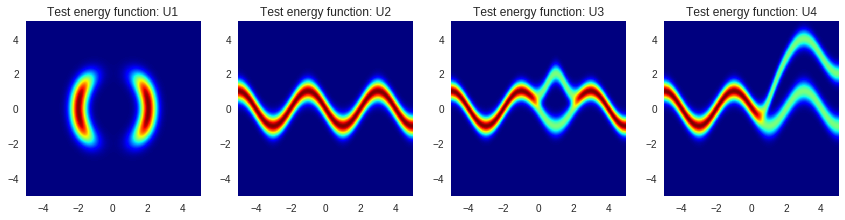

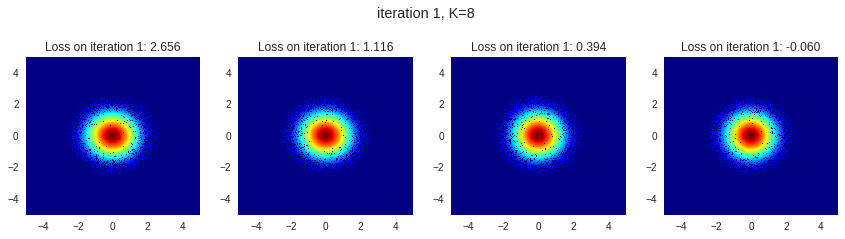

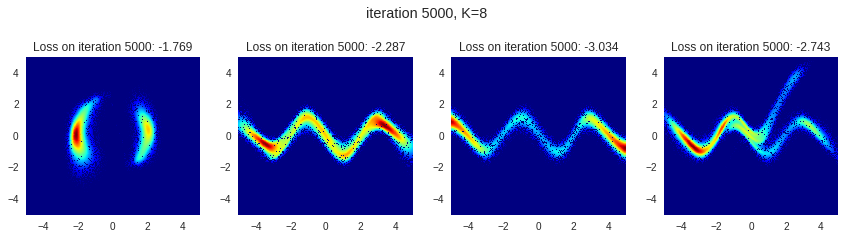

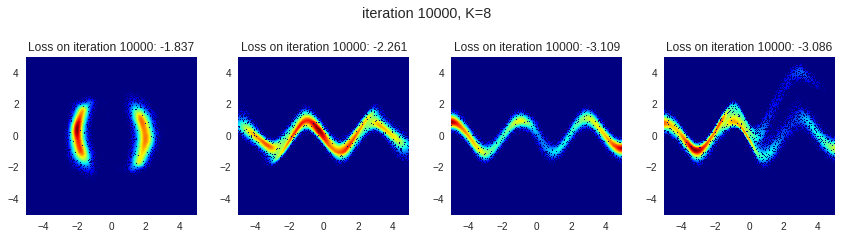

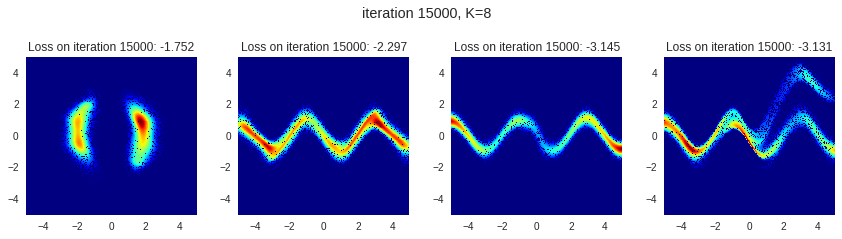

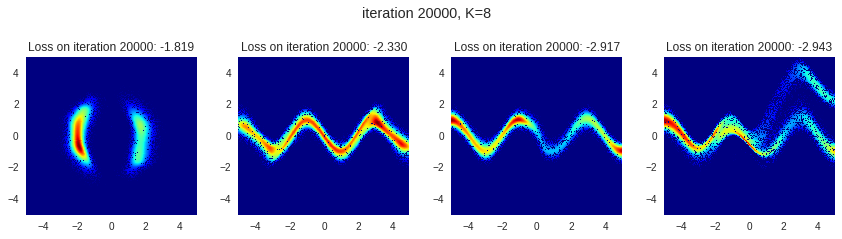

In [0]:
densities = [U1_, U2_, U3_, U4_]
batch_size = torch.Size([200])
iterations = 20000
K = 8

q_0 = multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))

nets = []
KLs_ = []
optimizers = []
for i in range(4):
  nets.append(PlanarFlows(2, K))
  KLs_.append(KL(densities[i],q_0))
  optimizers.append(optim.Adam(nets[i].parameters(),lr=0.011))
  optimizers[i].zero_grad()

plot_densities(densities)          

def should_log(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
def should_plot(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
for i in range(1, iterations + 1):                             
    z_0 = q_0.sample(batch_size)
    
    loss = []
    for j in range(4):
      z_k, log_dets = nets[j](z_0)
      loss.append(KLs_[j](z_0, z_k, log_dets))
      
      optimizers[j].zero_grad()
      loss[j].backward()
      optimizers[j].step()
    
    #if should_log(i):
            #print("Loss on iteration {}: {}".format(i , loss.item()))
    
    if should_plot(i):
            save_images(q_0, nets, i, K, loss)

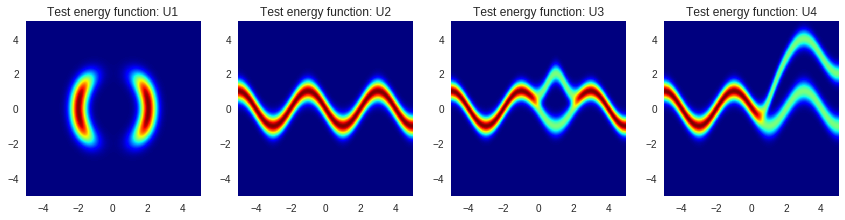

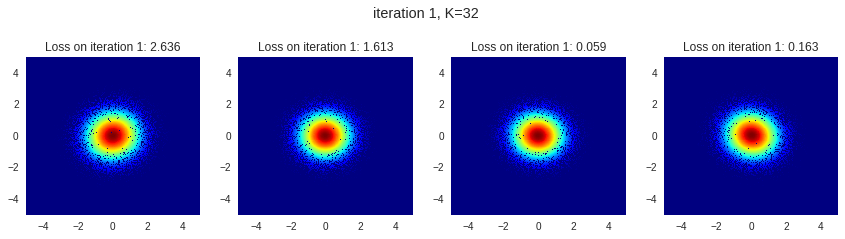

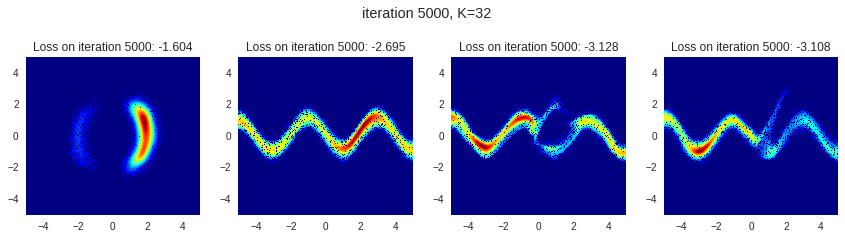

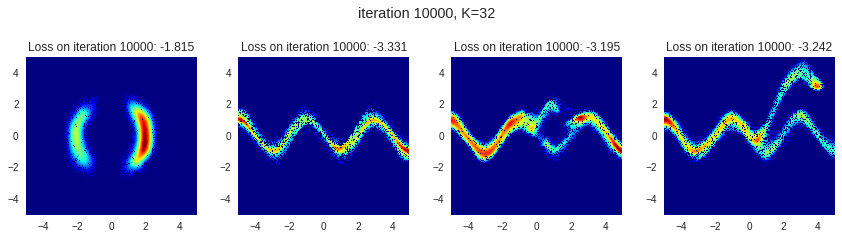

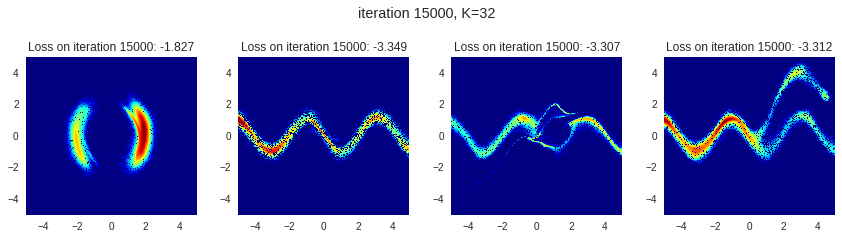

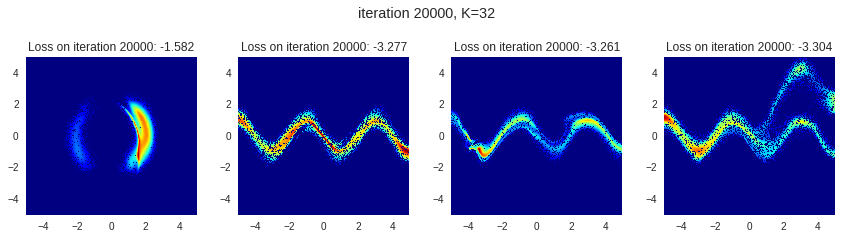

In [0]:
densities = [U1_, U2_, U3_, U4_]
batch_size = torch.Size([200])
iterations = 20000
K = 32

q_0 = multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))

nets = []
KLs_ = []
optimizers = []
for i in range(4):
  nets.append(PlanarFlows(2, K))
  KLs_.append(KL(densities[i],q_0))
  optimizers.append(optim.Adam(nets[i].parameters(),lr=0.011))
  optimizers[i].zero_grad()

plot_densities(densities)          

def should_log(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
def should_plot(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
for i in range(1, iterations + 1):                             
    z_0 = q_0.sample(batch_size)
    
    loss = []
    for j in range(4):
      z_k, log_dets = nets[j](z_0)
      loss.append(KLs_[j](z_0, z_k, log_dets))
      
      optimizers[j].zero_grad()
      loss[j].backward()
      optimizers[j].step()
    
    #if should_log(i):
            #print("Loss on iteration {}: {}".format(i , loss.item()))
    
    if should_plot(i):
            save_images(q_0, nets, i, K, loss)

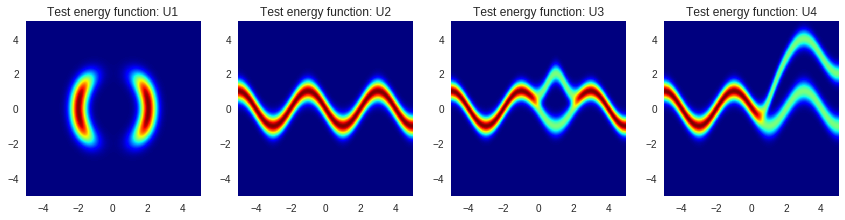

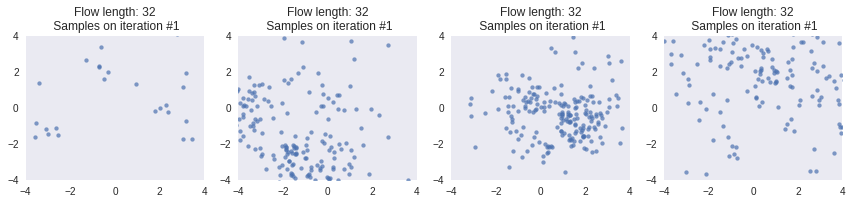

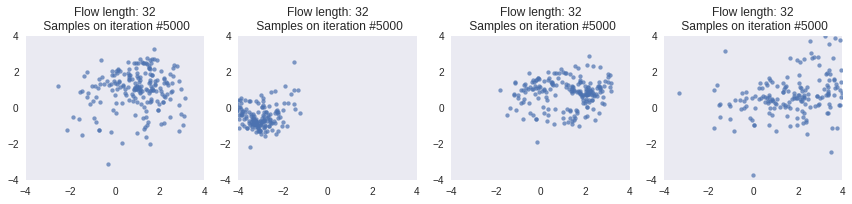

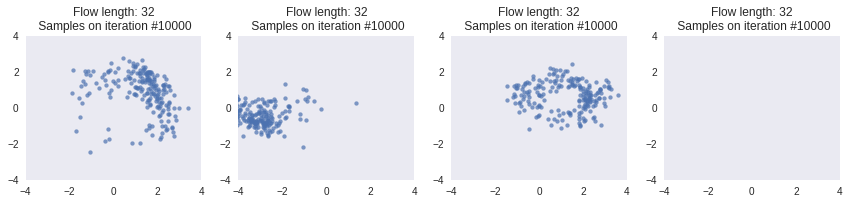

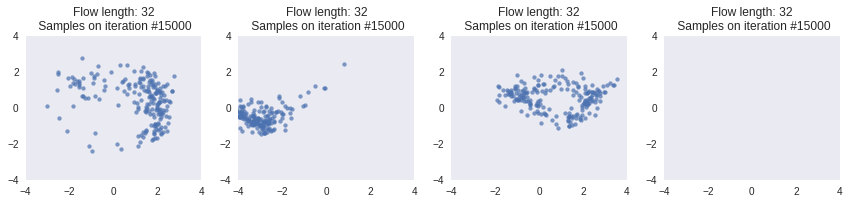

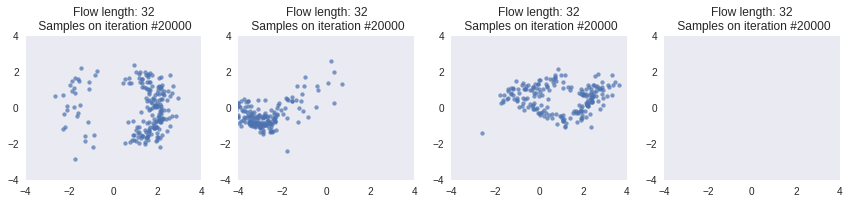

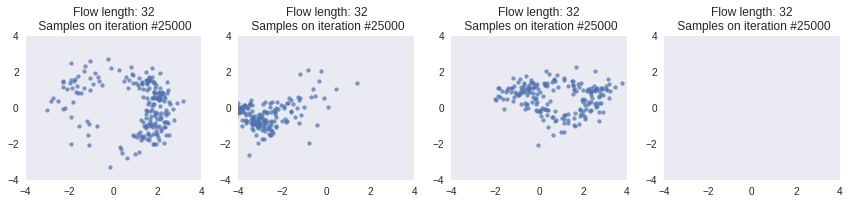

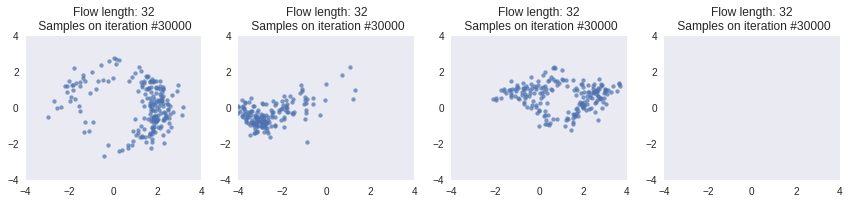

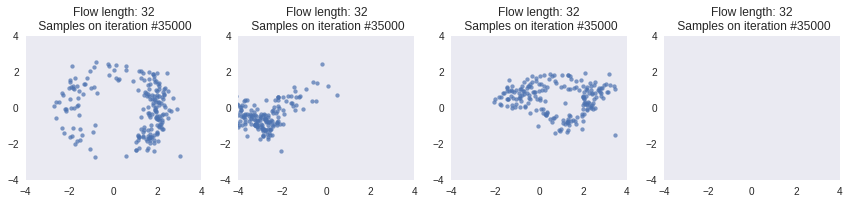

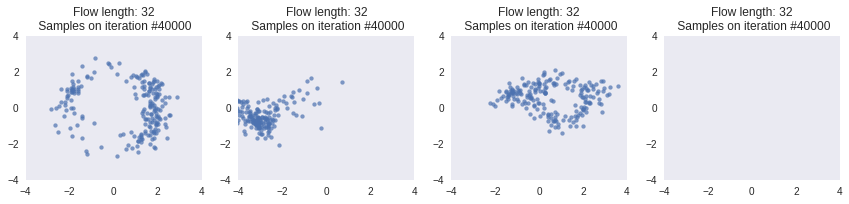

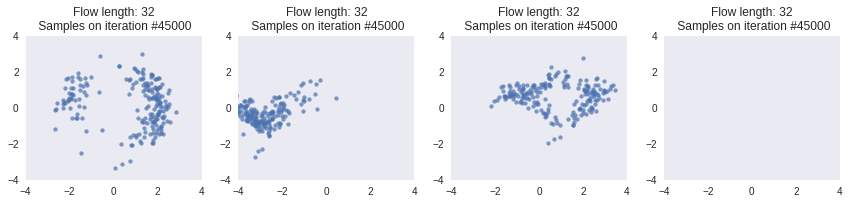

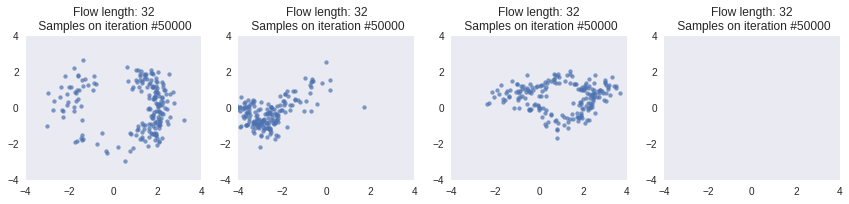

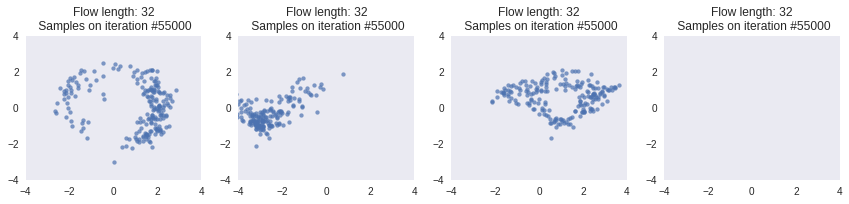

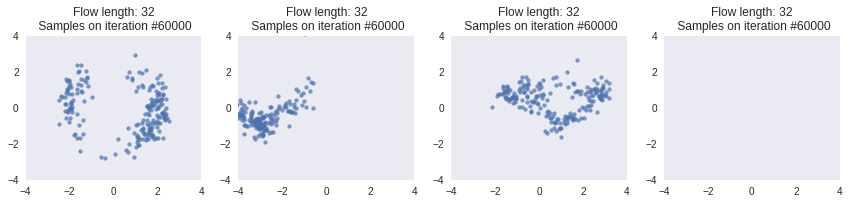

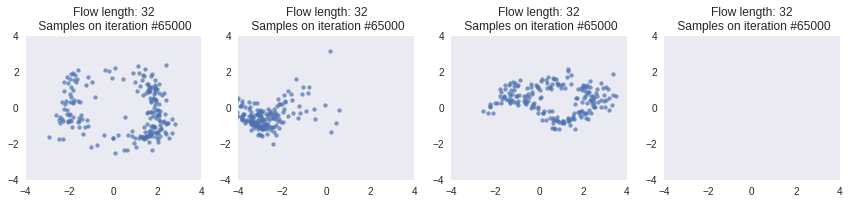

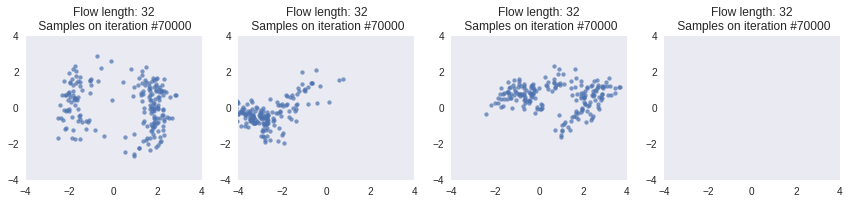

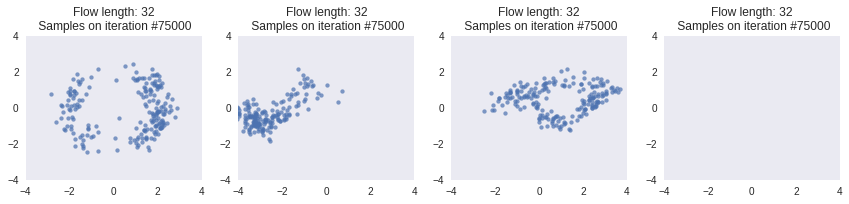

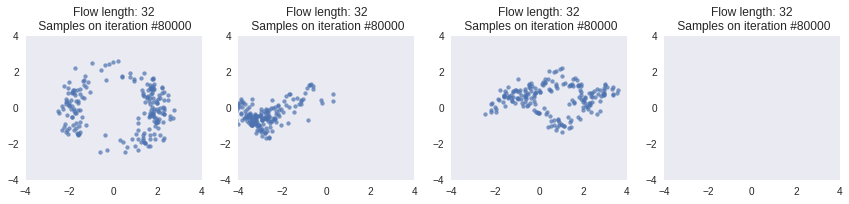

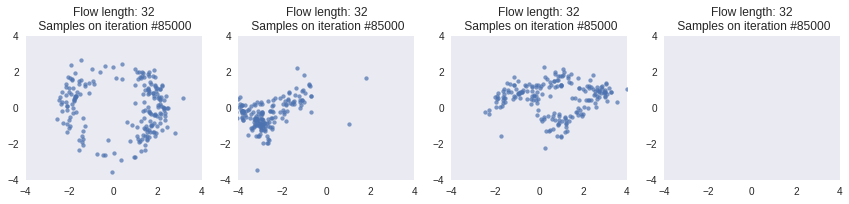

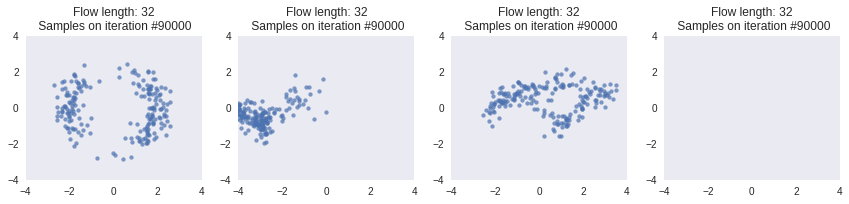

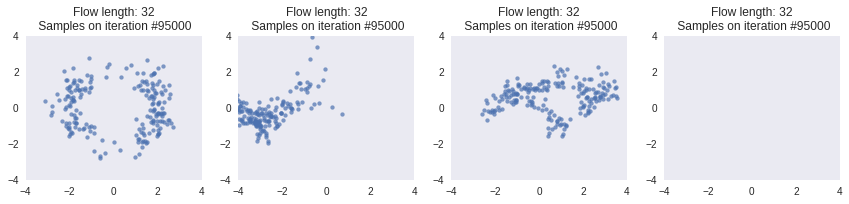

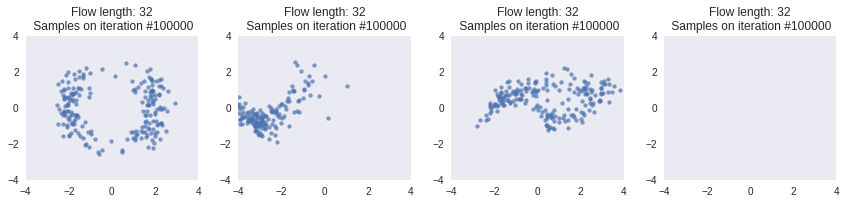

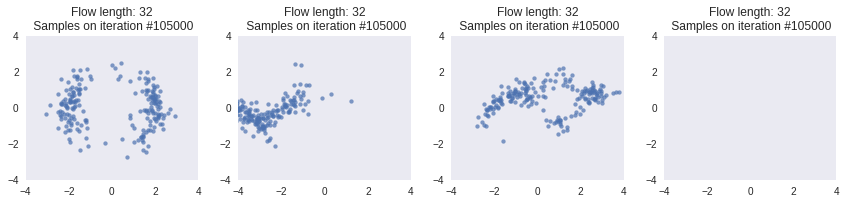

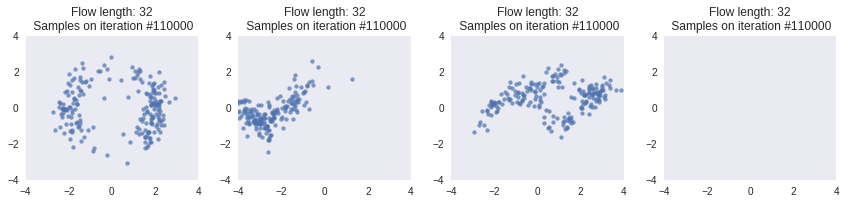

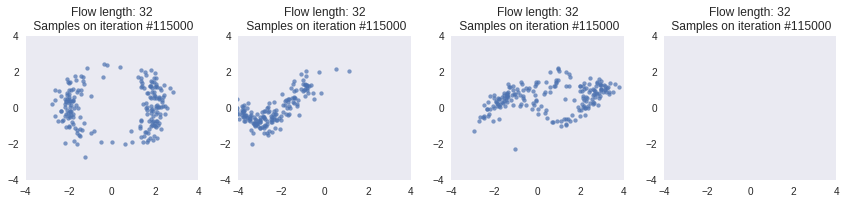

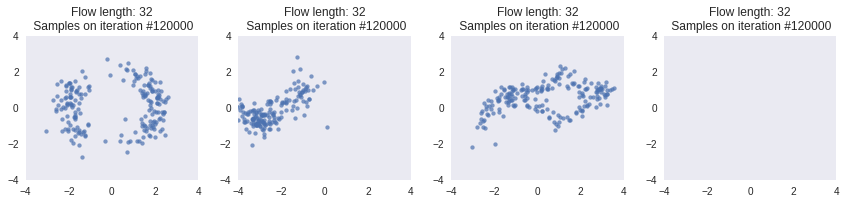

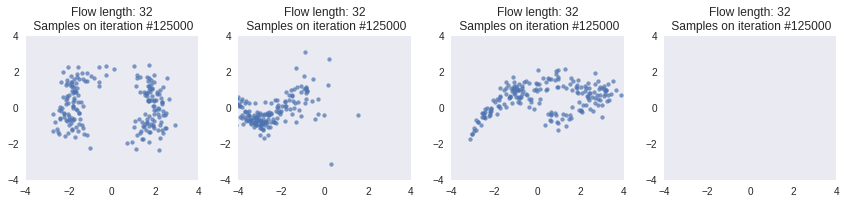

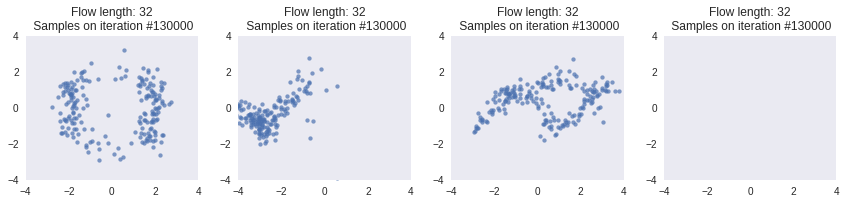

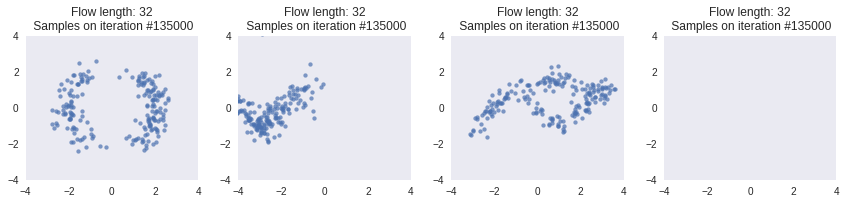

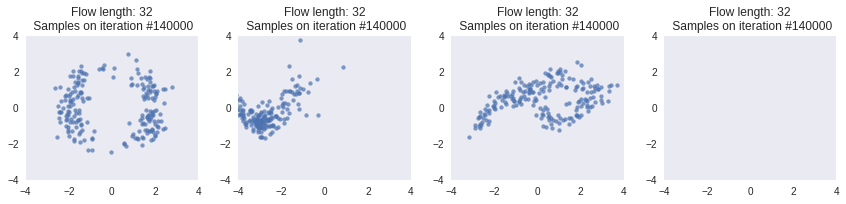

In [0]:
densities = [U1_, U2_, U3_, U4_]
batch_size = torch.Size([200])
iterations = 500000
K = 32

q_0 = multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))

nets = []
KLs_ = []
optimizers = []
for i in range(4):
  nets.append(RadialFlows(2, K))
  KLs_.append(KL(densities[i],q_0))
  optimizers.append(optim.RMSprop(nets[i].parameters(),lr=1e-5, momentum=0.9))
  optimizers[i].zero_grad()

plot_densities(densities)          

def should_log(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
def should_plot(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
for i in range(1, iterations + 1):                             
    z_0 = q_0.sample(batch_size)
    z_ = []
    loss = []
    for j in range(4):
      z_k, log_dets = nets[j](z_0)
      z_.append(z_k)
      loss.append(KLs_[j](z_0, z_k, log_dets))
      optimizers[j].zero_grad()
      loss[j].backward()
      optimizers[j].step()
    
    #if should_log(i):
            #print("Loss on iteration {}: {}".format(i , loss.item()))
    
    if should_plot(i):
        scatter_points(z_, i, K)

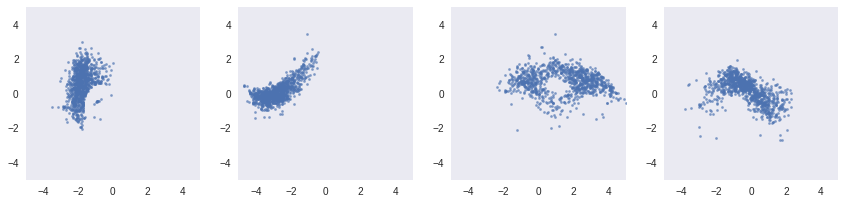

In [0]:
z = q_0.sample(torch.Size([1000]))
    
nx = 4
ny = 1

dxs = 3.0
dys = 3.0

fig, axes = plt.subplots(1, 4, figsize=(dxs*nx, dys*ny))
    
axes = axes.flatten()
    
for i in range(4):
  ax = axes[i]
  z_k = nets[i](z)
  z_ = z_k[0].detach().numpy()
  ax.scatter(z_[:, 0], -z_[:, 1], alpha=0.7, s=5)
  ax.set_xlim(*X_LIMS)
  ax.set_ylim(*Y_LIMS)
  ax.grid(False)
fig.tight_layout()
plt.show()

In [0]:
densities = [U1_, U2_, U3_, U4_]
batch_size = torch.Size([200])
iterations = 20000
K = 8

q_0 = multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))
z_0 = q_0.sample(batch_size)

nets = []
KLs_ = []
optimizers = []
for i in range(4):
  nets.append(RadialFlows(z_0, 2, K))
  KLs_.append(KL(densities[i],q_0))
  optimizers.append(optim.Adam(nets[i].parameters(),lr=0.011))
  optimizers[i].zero_grad()

plot_densities(densities)          

def should_log(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
def should_plot(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
for i in range(1, iterations + 1):                             
    z_ = q_0.sample(batch_size)
    
    loss = []
    for j in range(4):
      z_k, log_dets = nets[j](z_)
      loss.append(KLs_[j](z_, z_k, log_dets))
      
      optimizers[j].zero_grad()
      loss[j].backward()
      optimizers[j].step()
    
    #if should_log(i):
            #print("Loss on iteration {}: {}".format(i , loss.item()))
    
    if should_plot(i):
            save_images(q_0, nets, i, K, loss)

In [0]:
densities = [U1_, U2_, U3_, U4_]
batch_size = torch.Size([200])
iterations = 20000
K = 32

q_0 = multivariate_normal.MultivariateNormal(torch.zeros(2), torch.eye(2))
z_0 = q_0.sample(batch_size)

nets = []
KLs_ = []
optimizers = []
for i in range(4):
  nets.append(RadialFlows(z_0, 2, K))
  KLs_.append(KL(densities[i],q_0))
  optimizers.append(optim.Adam(nets[i].parameters(),lr=0.014))
  optimizers[i].zero_grad()

plot_densities(densities)          

def should_log(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
def should_plot(iteration):
        return iteration % 5000 == 0 or iteration == 1
    
for i in range(1, iterations + 1):                             
    z_ = q_0.sample(batch_size)
    
    loss = []
    for j in range(4):
      z_k, log_dets = nets[j](z_)
      loss.append(KLs_[j](z_, z_k, log_dets))
      
      optimizers[j].zero_grad()
      loss[j].backward()
      optimizers[j].step()
    
    #if should_log(i):
            #print("Loss on iteration {}: {}".format(i , loss.item()))
    
    if should_plot(i):
            save_images(q_0, nets, i, K, loss)

In [0]:
def _interleave(z_a, z_b):
    rows = []
    for k in range(z_b.shape[1]):
      rows.append(z_a[k,:])
      rows.append(z_b[k,:])
    
    if z_a.shape[1] > z_b.shape[1]:
       rows.append(z_a[-1:])
   
    return torch.stack(rows, dim=0)
  
def _relu_networks(D, d, hidden_dim=1000, num_layers=5):
  _h_lambda = [ torch.nn.Linear(d, hidden_dim) ]
  for _ in range(num_layers):
    _h_lambda.append( torch.nn.Linear(hidden_dim, hidden_dim) )
    _h_lambda.append( torch.nn.ReLU() )
  _h_lambda.append( torch.nn.Linear(hidden_dim, D-d) )
  return torch.nn.Sequential( *_h_lambda )


class NICE(torch.nn.Module):
  def __init__(self, *args):
    super(NICE, self).__init__()
    
    self.d = args[0]
    self.add_module('h_', args[1])
    
  def coupling_law(self, a, b):
    print(a.size(), b.size())
    return (a + b.t())
  
  def anticoupling_law(self, a, b):
    return (a - b)
  
  def forward(self, z):
    perm = torch.randperm(z.size(0))
    z_a = z[perm[:self.d]]
    z_b = z[perm[self.d:]]
    return _interleave(
      z_a, 
      self.coupling_law(z_b, self.h_(z_a.t()))
    )
  
  def inverse(self, y):
    perm = torch.randperm(y.size(0))
    y_a = y[perm[:self.d]]
    y_b = y[perm[self.d:]]
    return _interleave(
      y_a, 
      self.anticoupling_law(y_b, self.h_(y_a))
    )

class NICEFlows(torch.nn.Module):
  def __init__(self, *args):
    super(NICEFlows, self).__init__()
    
    self.d = args[0]
    self.batch_size = args[1]
    K = args[2]
    self.flows = torch.nn.ModuleList([
        NICE(self.d, _relu_networks(self.batch_size, self.d)) for i in range(K)
    ])
    
    self.scaling_diag = torch.nn.Parameter(torch.ones(args[1]))
    
    self.init_params()
    
  def init_params(self):
    for f in self.flows:
      for param in f.parameters():
        if len(param.shape) > 1:
          torch.nn.init.kaiming_uniform_(param, nonlinearity='relu')
        else:
          torch.nn.init.normal_(param, mean=0., std=0.001)
  
  def forward(self, z):
    y_ = z
    for f in self.flows:
      y_ = f(y_)
    y_ = torch.matmul(y_, torch.diag(torch.exp(self.scaling_diag)))
    return y_
  
  def inverse(self, y):
    z_ = y
    with torch.no_grad():
      z_ = torch.matmul(z_, torch.diag(torch.reciprocal(torch.exp(self.scaling_diag))))
      for f in reversed(self.flows):
        z_ = f.inverse(z_)
    return z_